In [1]:
# load the required packages
import pandas as pd
import geopandas as gpd
from shapely import wkt

import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

/home/xuyuan/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_7621/2304926617.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly 

In [2]:
data = pd.read_stata(r'../regression analysis/regression_analysis.dta')
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data, geometry = data.geometry, crs = 'epsg:4326')

In [3]:
'''
# this code is to generate the figure 1's base map
name_city = data['city'].unique().tolist()
for name in name_city:
    df = data[data['city'] == name]
    df = df[df['year'] == 2020]
     
    df.to_file(r'figure_1_base_map\{}.shp'.format(name))
'''

"\n# this code is to generate the figure 1's base map\nname_city = data['city'].unique().tolist()\nfor name in name_city:\n    df = data[data['city'] == name]\n    df = df[df['year'] == 2020]\n     \n    df.to_file(r'figure_1_base_map\\{}.shp'.format(name))\n"

In [4]:
df = pd.read_csv("aggregated hospital ratio data/aggregated ratio.csv")
city_order = {'beijing': 0, 'tianjin': 1, 'shanghai': 2, 'nanjing': 3, 'hangzhou': 4, 'guangzhou': 5, 
              'shenzhen': 6, 'chengdu': 7, 'chongqing': 8, 'wuhan': 9, "xi'an": 10}
df['city_rank'] = df['city'].map(city_order)
df = df.sort_values('city_rank', ascending = False)
df = df.drop('city_rank', axis=1)

In [5]:
df.reset_index(drop = True, inplace = True)
df

,sanji,erji,yiji,kou,city,sum,sp,ep,yp
0,31,130,64,1338,xi'an,1563,1.98%,8.32%,4.09%
1,55,52,21,939,wuhan,1067,5.15%,4.87%,1.97%
2,26,181,27,2197,chongqing,2431,1.07%,7.45%,1.11%
3,23,128,19,2153,chengdu,2323,0.99%,5.51%,0.82%
4,8,42,17,2691,shenzhen,2758,0.29%,1.52%,0.62%
5,47,107,64,1628,guangzhou,1846,2.55%,5.80%,3.47%
6,36,67,8,1205,hangzhou,1316,2.74%,5.09%,0.61%
7,30,71,11,676,nanjing,788,3.81%,9.01%,1.40%
8,50,275,250,1423,shanghai,1998,2.50%,13.76%,12.51%
9,61,103,25,1329,tianjin,1518,4.02%,6.79%,1.65%


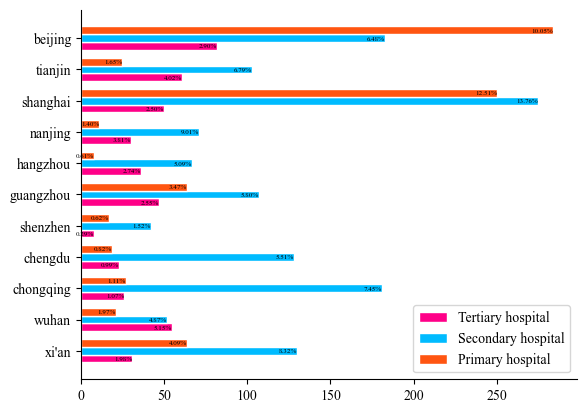

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
barHeight = 0.25
r1 = np.arange(len(df['sanji']))
r2 = [y + barHeight for y in r1]
r3 = [y + barHeight for y in r2]

fig, ax = plt.subplots()  # Create a figure and axis

rect1 = ax.barh(r1, df['sanji'], color='#FF0088', height=barHeight, edgecolor='white', label='Tertiary hospital')
rect2 = ax.barh(r2, df['erji'], color='#00BBFF', height=barHeight, edgecolor='white', label='Secondary hospital')
rect3 = ax.barh(r3, df['yiji'], color='#FF5511', height=barHeight, edgecolor='white', label='Primary hospital')

i = 0
for rect in rect1:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['sp'][i], size=5, ha='right', va='center')
    i += 1

i = 0
for rect in rect2:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['ep'][i], size=5, ha='right', va='center')
    i += 1

i = 0
for rect in rect3:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['yp'][i], size=5, ha='right', va='center')
    i += 1

ax.yaxis.tick_left()  # Display ticks only on the left side
ax.xaxis.tick_bottom()  # Display ticks only on the bottom

plt.yticks([r + barHeight for r in range(len(df['sanji']))], df['city'])

# Create a legend
plt.legend()

# Remove the right and upper axis spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
# plt.show()

plt.savefig('figure2.tiff', bbox_inches='tight', dpi=400)

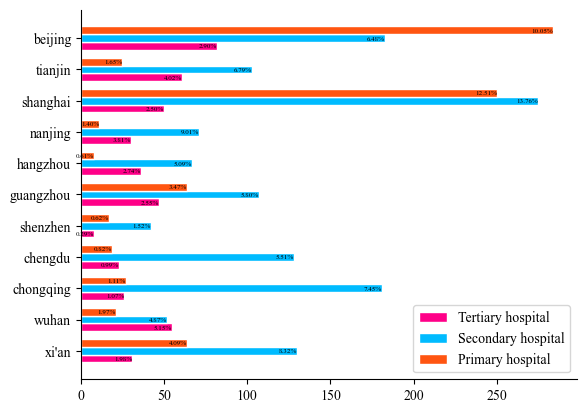

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
barHeight = 0.25
r1 = np.arange(len(df['sanji']))
r2 = [y + barHeight for y in r1]
r3 = [y + barHeight for y in r2]

fig, ax = plt.subplots()  # Create a figure and axis

rect1 = ax.barh(r1, df['sanji'], color='#FF0088', height=barHeight, edgecolor='white', label='Tertiary hospital')
rect2 = ax.barh(r2, df['erji'], color='#00BBFF', height=barHeight, edgecolor='white', label='Secondary hospital')
rect3 = ax.barh(r3, df['yiji'], color='#FF5511', height=barHeight, edgecolor='white', label='Primary hospital')

i = 0
for rect in rect1:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['sp'][i], size=5, ha='right', va='center')
    i += 1

i = 0
for rect in rect2:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['ep'][i], size=5, ha='right', va='center')
    i += 1

i = 0
for rect in rect3:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['yp'][i], size=5, ha='right', va='center')
    i += 1

ax.yaxis.tick_left()  # Display ticks only on the left side
ax.xaxis.tick_bottom()  # Display ticks only on the bottom

plt.yticks([r + barHeight for r in range(len(df['sanji']))], df['city'])

# Create a legend
plt.legend()

# Remove the right and upper axis spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
# plt.show()

plt.savefig('figure2.tiff', bbox_inches='tight', dpi=400)

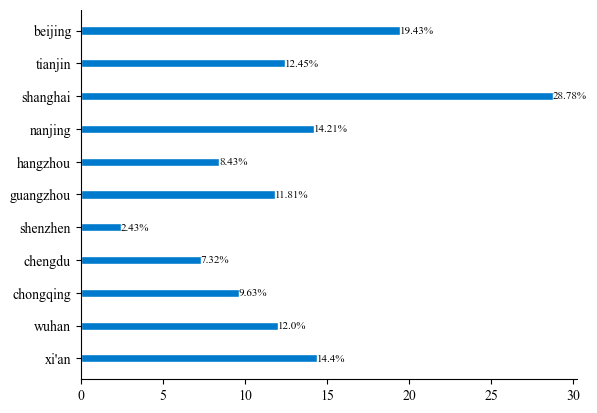

In [13]:
import numpy as np
df['total'] = df['sanji'] + df['erji'] + df['yiji']
df['ratio'] = df['total'] / df['sum']
df['ratio'] = df['ratio'] * 100
df['ratio'] = df['ratio'].round(2)
# Proceeding with plotting
plt.rcParams["font.family"] = "Times New Roman"
barHeight = 0.25
r = np.arange(len(df['city']))

fig, ax = plt.subplots()

# Plotting the summed values
rects = ax.barh(r, df['ratio'], color='#007ACC', height=barHeight, edgecolor='white', label='Total Hospitals')

# Adding text labels for each bar
for i, rect in enumerate(rects):
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, f"{df['ratio'][i]}%", size=8, ha='left', va='center')

plt.yticks(r, df['city'])

# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figure2.tiff', bbox_inches='tight', dpi=400)
# Show the plot
plt.show()